In [1]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from analysis import *

In [17]:
settings = { 
    "max_size": 12000,
    "min_size": 250,
    "bin_size": 250,
    "min_stat": 2,
    "mid_separation": 2000,
    "large_separation": 5000
}

In [18]:
data = pd.read_csv("objemy.csv", sep=";")
data = data.replace(0, np.nan)
pd.set_option('precision', 1)
data.describe()

České Budějovice  Frýdek-Místek  Havířov  Hradec Králové   Jihlava  \
count           21174.0        10894.0   8478.0         22884.0   13897.0   
mean             1309.4         1167.1   1384.1          1174.6    1071.4   
std              4358.1         4722.9   2611.1          5089.3    4388.3   
min                 6.0            6.0     17.0             5.0       3.0   
25%               109.0          110.0    191.0           102.0      97.0   
50%               322.0          316.0    388.0           299.0     268.0   
75%               825.8          671.0   1934.0           614.0     603.0   
max            165533.0       251916.0  73589.0        262793.0  226649.0   

        Karviná    Kladno      Most     Opava  Pardubice  Ústí nad Labem  \
count    9737.0   14248.0    8957.0   14868.0    21678.0         20946.0   
mean     1045.1    1091.5    1586.8    1059.9     1109.7          1032.7   
std      3171.0    5229.2    6405.2    3093.4     4665.3          3549.7   
min        11.0       4.0       9.0       3.0        4.0             3.0   
25%        98.0     132.0      90.0     114.0       88.0            94.0   
50%       234.0     298.0     157.0     361.0      289.0           206.0   
75%       659.0     524.0     700.0     795.0      570.0           562.0   
max    122563.0  247883.0  312814.0  136616.0   323089.0        284456.0   

           Zlín  
count   19724.0  
mean     1018.4  
std      4089.4  
min         8.0  
25%       139.0  
50%       300.0  
75%       543.0  
max    260932.0

In [19]:
pd.reset_option('precision')
cities = process_data(data, settings)

In [20]:
city_select = widgets.Dropdown(
    options=cities,
    description='City:',
    disabled=False,
)

In [21]:
widgets.interact(plot_city, city=city_select, settings=widgets.fixed(settings))

interactive(children=(Dropdown(description='City:', options={'České Budějovice': <analysis.CityDistribution ob…

<function analysis.plot_city(city, settings)>

In [7]:
%matplotlib agg
im=widgets.interact_manual(export_cities, 
                           cities=widgets.fixed(cities), 
                           settings=widgets.fixed(settings), 
                           export_type=widgets.Text(value='pdf')
)
im.widget.children[2].description = 'Export all figures'
display(im)
%matplotlib inline

interactive(children=(Text(value='pdf', description='export_type'), Text(value='export/', description='prefix'…

<function analysis.export_cities(cities, settings, export_type, prefix='export/')>

In [8]:
odchylky=gstats_cities(cities, settings)

sort_select = widgets.Dropdown(
    options=odchylky.columns,
    description='Variable:',
    disabled=False,
)
odx = None
def odchylky_plot(odchylky, odx, by):
    odchylky = odchylky.sort_values(by=by)
    odx = odchylky.plot(kind='bar')
widgets.interact(odchylky_plot, by=sort_select, odx=widgets.fixed(odx), odchylky=widgets.fixed(odchylky))
def od_save(odx, fname):
    odx.figure.savefig(fname, bbox_inches='tight', pad_inches=0)
im=widgets.interact_manual(od_save, fname=widgets.Text(value='odchylky.pdf'), odx=widgets.fixed(odx))
im.widget.children[0].description = 'File name'
im.widget.children[1].description = 'Export'

interactive(children=(Dropdown(description='Variable:', options=('Log. std. dev.', 'Low', 'Mid', 'High'), valu…

interactive(children=(Text(value='odchylky.pdf', description='fname'), Button(description='Run Interact', styl…

In [9]:
odchylky

Log. std. dev.   Low   Mid      High
České Budějovice        3.118595  None  None  1.638241
Frýdek-Místek           2.962776  None  None  1.822871
Havířov                 3.567602  None  None  1.627659
Hradec Králové          3.089921  None  None  1.779680
Jihlava                 2.704779  None  None  1.831648
Karviná                 3.180047  None  None  1.910731
Kladno                  3.441033  None  None  1.959021
Most                    2.961986  None  None  1.624041
Opava                   3.154246  None  None  1.944253
Pardubice               3.170480  None  None  1.903272
Ústí nad Labem          2.984541  None  None  1.864218
Zlín                    3.057058  None  None  1.783651

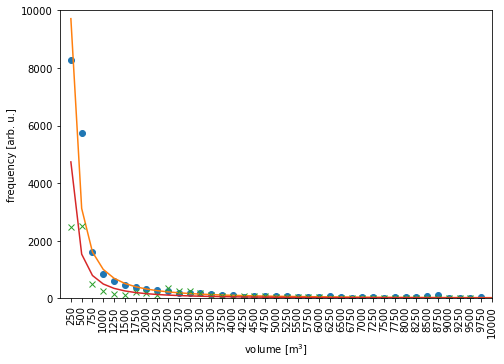

In [10]:
c2 = plot_two_linear(cities["České Budějovice"], cities["Havířov"], settings)

In [11]:
c2.savefig("cb_hav.jpeg", bbox_inches='tight', pad_inches=0, dpi=600)